## Final Project Submission

Please fill out:
* Student name: Brenda Mutai
* Student pace: full time
* Scheduled project review date/time: 3/7/2023
* Instructor name: Mark Tiba
* Blog post URL:


ANALYSIS OF KING COUNTY HOUSES

OVERVIEW

The King county house data analyses houses in order to make recommendations to a real estate agency. The data has information about fixed aspects of the houses that include the location, the year the house was built, and features that can be modified in the house. The various characteristics of the homes will determine various variables such as the house sqft, number of floors, and number of bathrooms used in the linear regression analysis to find the highest correlation of the features. From this data, we will be able to maximize the house's resale values.

BUSINESS PROBLEM

The real estate company is interested in doing renovations to improve the home values in King County. Hence to assist the King County real estate agency we will have to understand the market value of the local houses while comparing others in order to recommend profitable renovations to King County clients.

DATA UNDERSTANDING

The data provided  has different aspects of the homes. These comprise the year they were constructed, the cost of the home, and the number of bedrooms, bathrooms, and floors, among other essential details of the house such as the views.

Reading the dataset

In [41]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

In [42]:

data= pd.read_csv("data/kc_house_data.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [43]:
#column names
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [44]:
#examine the data
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [45]:
#details on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [46]:
#description of  house grade
data.groupby('grade')['grade'].count()

grade
10 Very Good     1134
11 Excellent      399
12 Luxury          89
13 Mansion         13
3 Poor              1
4 Low              27
5 Fair            242
6 Low Average    2038
7 Average        8974
8 Good           6065
9 Better         2615
Name: grade, dtype: int64

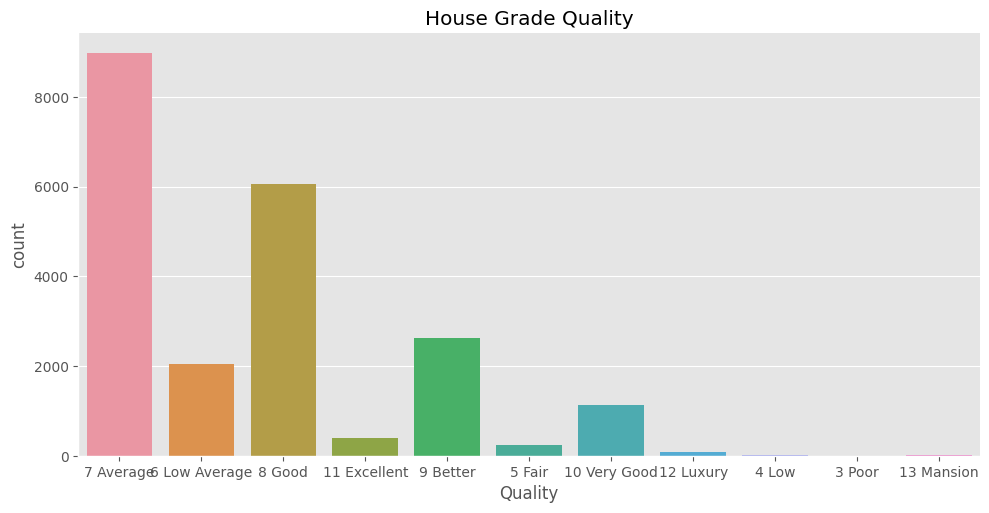

In [47]:
#checking the house grade
fg = sns.catplot(x='grade', data=data, kind='count', aspect=2)
fg.set_xlabels('Quality')
plt.title('House Grade Quality')
#display the plot
plt.show()

In [48]:
#description of house condition
data.groupby('condition')['condition'].count()

condition
Average      14020
Fair           170
Good          5677
Poor            29
Very Good     1701
Name: condition, dtype: int64

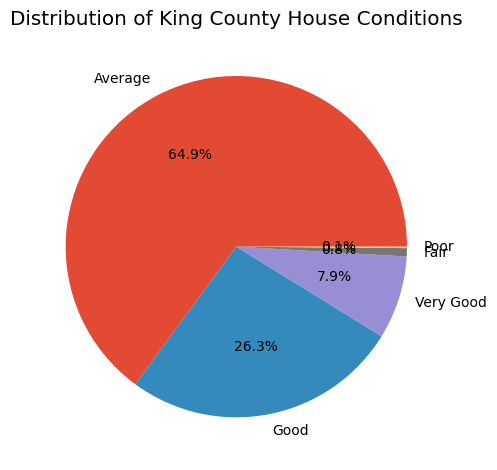

In [49]:
#house condition
condition_counts = data['condition'].value_counts()

plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%')
plt.title('Distribution of King County House Conditions')
plt.tight_layout()
plt.show()

In [50]:
#description of datasets
data.groupby('bedrooms')['bedrooms'].count()

bedrooms
1      196
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

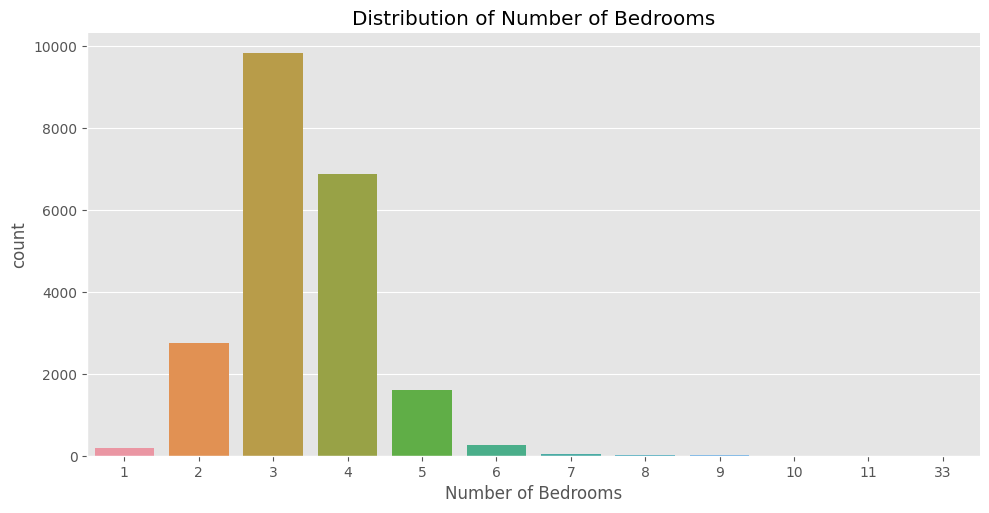

In [51]:
#checking the majority of bedrooms
fg = sns.catplot(x='bedrooms', data=data, kind='count', aspect=2)
fg.set_xlabels('Number of Bedrooms')
plt.title('Distribution of Number of Bedrooms')
#display the plot
plt.show()

In [52]:
#checking bathrooms
data.groupby('bathrooms')['bathrooms'].count()

bathrooms
0.50       4
0.75      71
1.00    3851
1.25       9
1.50    1445
1.75    3048
2.00    1930
2.25    2047
2.50    5377
2.75    1185
3.00     753
3.25     589
3.50     731
3.75     155
4.00     136
4.25      79
4.50     100
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
8.00       2
Name: bathrooms, dtype: int64

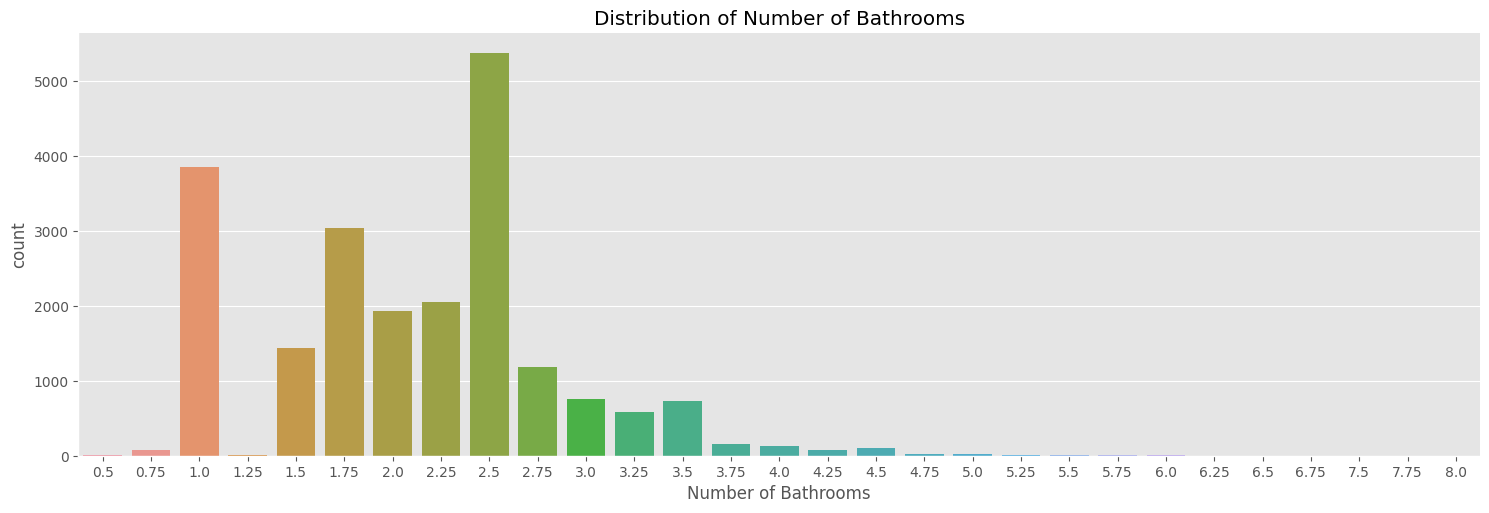

In [53]:
#houses bathrooms
fg =sns.catplot(x='bathrooms', data=data, kind='count', aspect=3)
fg.set_xlabels('Number of Bathrooms')
plt.title('Distribution of Number of Bathrooms')
plt.show()

In [54]:
counts = data['sqft_living'].value_counts()
print(counts)

sqft_living
1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
2507      1
9890      1
5584      1
1961      1
1425      1
Name: count, Length: 1034, dtype: int64


In [55]:
#home prices
counts=data['price'].value_counts()
print(counts)

price
450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
278800.0      1
439888.0      1
354901.0      1
942000.0      1
402101.0      1
Name: count, Length: 3622, dtype: int64


In [56]:
#number of floors
counts = data['floors'].value_counts()
print(counts)

floors
1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: count, dtype: int64


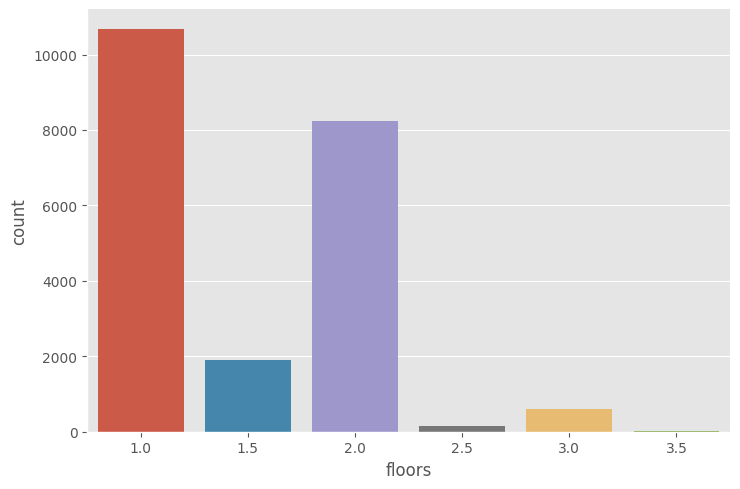

In [57]:
#number of floors
fg = sns.catplot(x='floors', data=data, kind='count', aspect=1.5)
fg.set_xlabels('floors')

In [58]:
#house view
counts=data['view'].value_counts()
print(counts)

view
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64


Text(0.5, 1.0, 'House Views')

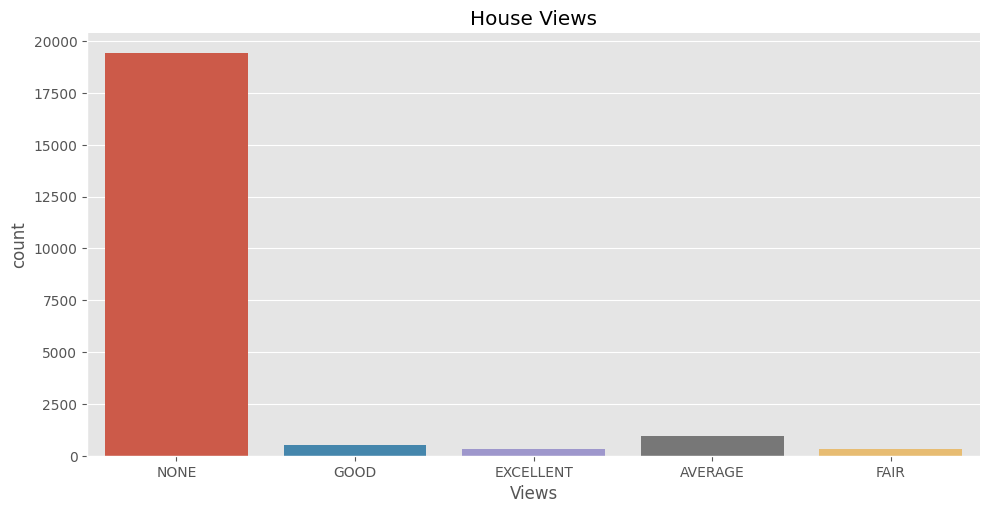

In [59]:
#house view
fg = sns.catplot(x='view', data=data, kind='count', aspect=2)
fg.set_xlabels('Views')
plt.title('House Views')

In [60]:
#houses id
counts=data['id'].value_counts()
print(counts)

id
795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: count, Length: 21420, dtype: int64


DATA CLEANING AND PREPARATION

Data preparation involves preparing the dataset for analysis.
This includes evaluating data for probable outliers, duplicated data, missing values, and handling category variables. In the given dataset, we will look for missing values, eliminate unwanted dataframes, and remove duplicates.

In [61]:
data_subset=data[['id','grade','condition','bedrooms', 'bathrooms','floors','sqft_living','price','view']].copy()
data_subset

,id,grade,condition,bedrooms,bathrooms,floors,sqft_living,price,view
0,7129300520,7 Average,Average,3,1.00,1.0,1180,221900.0,NONE
1,6414100192,7 Average,Average,3,2.25,2.0,2570,538000.0,NONE
2,5631500400,6 Low Average,Average,2,1.00,1.0,770,180000.0,NONE
3,2487200875,7 Average,Very Good,4,3.00,1.0,1960,604000.0,NONE
4,1954400510,8 Good,Average,3,2.00,1.0,1680,510000.0,NONE
...,...,...,...,...,...,...,...,...,...
21592,263000018,8 Good,Average,3,2.50,3.0,1530,360000.0,NONE
21593,6600060120,8 Good,Average,4,2.50,2.0,2310,400000.0,NONE
21594,1523300141,7 Average,Average,2,0.75,2.0,1020,402101.0,NONE
21595,291310100,8 Good,Average,3,2.50,2.0,1600,400000.0,NONE


In [62]:
#drop all the null values
data_subset.dropna(inplace=True)

In [63]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21534 entries, 0 to 21596
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21534 non-null  int64  
 1   grade        21534 non-null  object 
 2   condition    21534 non-null  object 
 3   bedrooms     21534 non-null  int64  
 4   bathrooms    21534 non-null  float64
 5   floors       21534 non-null  float64
 6   sqft_living  21534 non-null  int64  
 7   price        21534 non-null  float64
 8   view         21534 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 1.6+ MB


In [64]:
data_subset.describe()

,id,bedrooms,bathrooms,floors,sqft_living,price
count,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,2.153400e+04
mean,4.582351e+09,3.373038,2.115712,1.494126,2079.827854,5.400577e+05
std,2.876779e+09,0.926410,0.768602,0.539806,917.446520,3.660596e+05
min,1.000102e+06,1.000000,0.500000,1.000000,370.000000,7.800000e+04
25%,2.123212e+09,3.000000,1.750000,1.000000,1430.000000,3.220000e+05
50%,3.904945e+09,3.000000,2.250000,1.500000,1910.000000,4.500000e+05
75%,7.312175e+09,4.000000,2.500000,2.000000,2550.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,3.500000,13540.000000,7.700000e+06


DATA ANALYSIS AND MODELING

We will analyze the data using various variables because the purpose of this study is to find ways in which King County houses might be restored or upgraded in order to maximize the resale values.
The price will be the dependent variable while all the other features like bedrooms, bathrooms, sqft living, and floors will be the independent variables.

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'floors'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

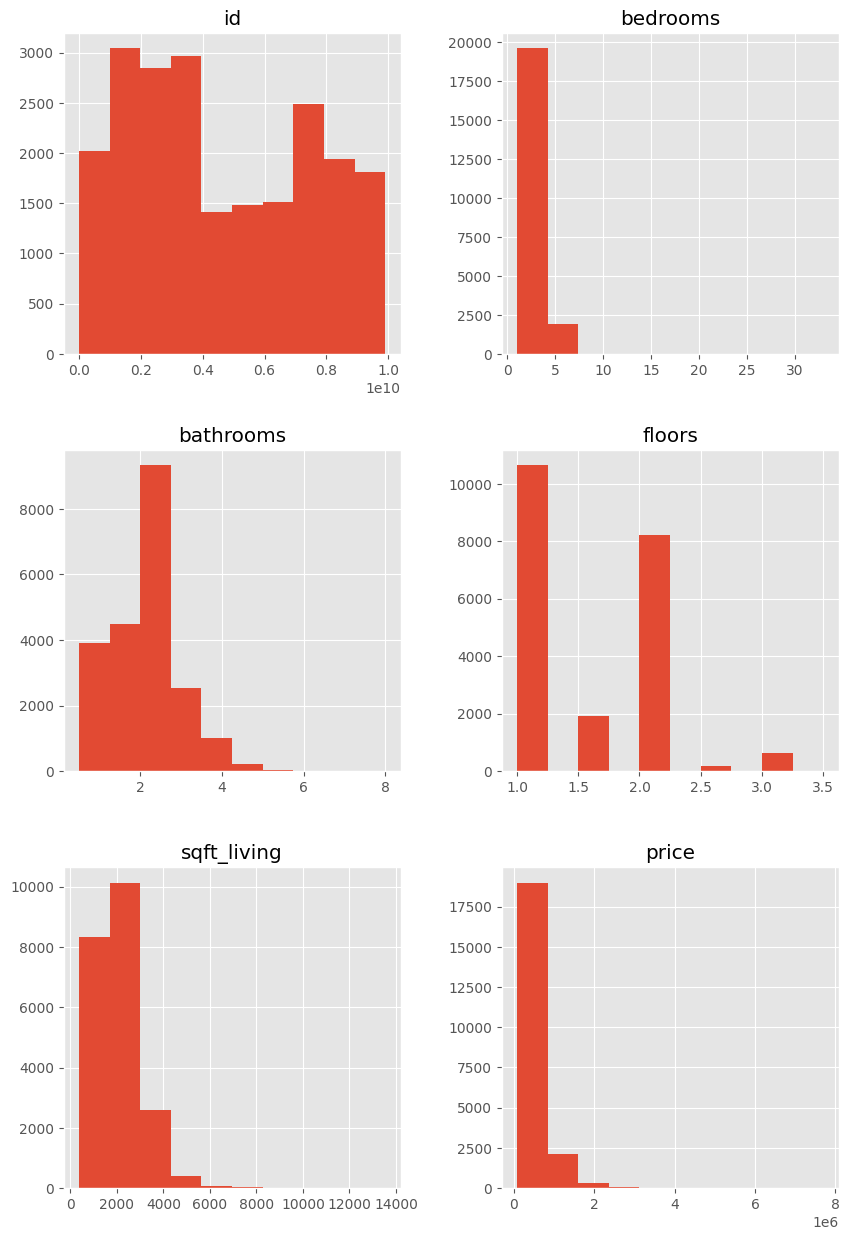

In [65]:
data_subset.hist(figsize=(10,15))

Correlated Variables

In [66]:
data_subset = data_subset.apply(pd.to_numeric, errors='coerce')

In [67]:
#Correlated values using the training and testing groups
training = data_subset.drop(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'price'],axis =1)
testing = data_subset.drop (['id', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'price'], axis =1)

X_training = data_subset.drop(["price"], axis =1)
y_training = data_subset["price"]

X_testing = data_subset.drop(["price"], axis=1)
y_testing = data_subset["price"]


X_training

,id,grade,condition,bedrooms,bathrooms,floors,sqft_living,view
0,7129300520,NaN,NaN,3,1.00,1.0,1180,NaN
1,6414100192,NaN,NaN,3,2.25,2.0,2570,NaN
2,5631500400,NaN,NaN,2,1.00,1.0,770,NaN
3,2487200875,NaN,NaN,4,3.00,1.0,1960,NaN
4,1954400510,NaN,NaN,3,2.00,1.0,1680,NaN
...,...,...,...,...,...,...,...,...
21592,263000018,NaN,NaN,3,2.50,3.0,1530,NaN
21593,6600060120,NaN,NaN,4,2.50,2.0,2310,NaN
21594,1523300141,NaN,NaN,2,0.75,2.0,1020,NaN
21595,291310100,NaN,NaN,3,2.50,2.0,1600,NaN


Correlation is a regression modelling measure which demonstrates that there likely to be a relationship between the independent and dependent variables. Price has a coerralation to the independent variables by using a heatmap to show the relationship within data subsets.

Text(0.5, 1.0, 'Correlation Heatmap')

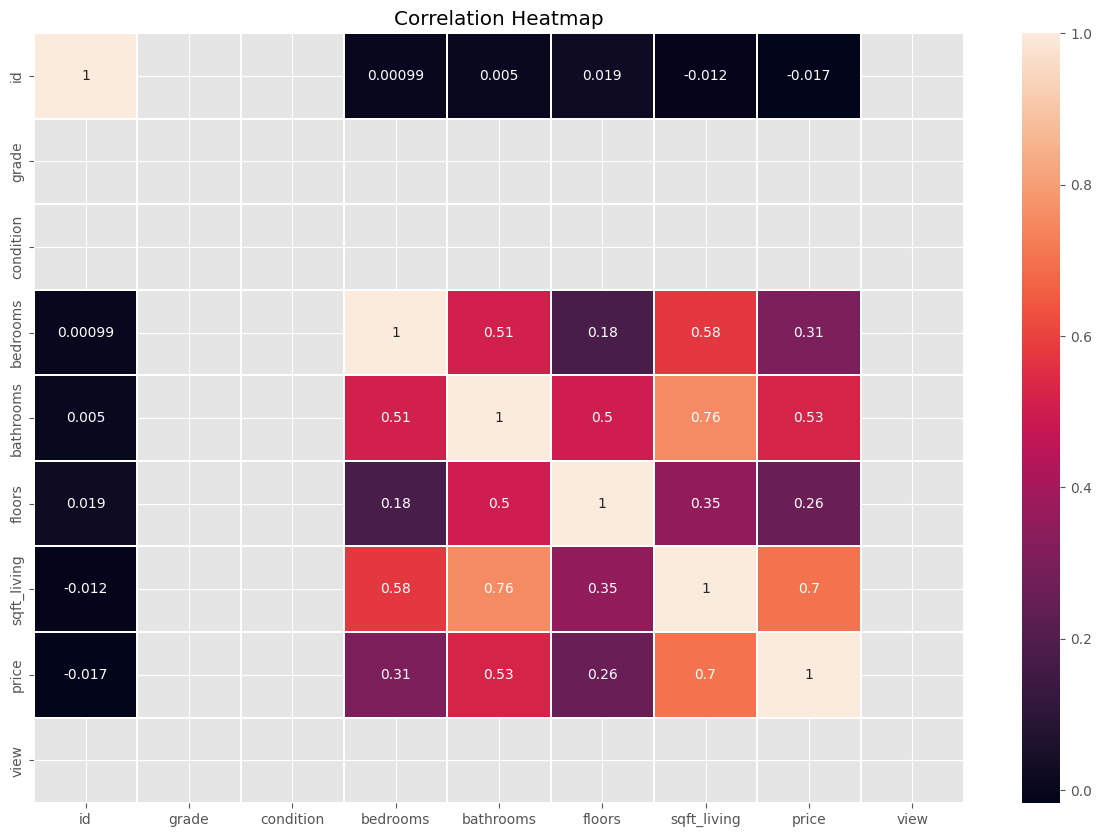

In [68]:
#set up figure showing visualization of correlation within the data subset with price as the dependent variable
plt.figure(figsize=(15,10))
#colors and labels indicating correlations
colormap= sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(data_subset.corr() , annot =True , linewidth =0.2)
# Customize the plot appearance
plt.title("Correlation Heatmap")

The sqft living and bathrooms are the most correlated variable to price.

In [69]:
#split dataframe into training and testing datasets
training_data, test_data = train_test_split(data_subset, train_size =0.8, random_state = 3)
reg = linear_model.LinearRegression()
#converting to a numpy array and reshaping
x_training = np.array(training_data['sqft_living']).reshape(-1,1)
y_training= np.array(training_data['price']).reshape(-1, 1)
reg.fit(x_training, y_training)
#evaluate simple model
x_test = np.array(test_data['sqft_living']).reshape(-1, 1)
y_test = np.array(test_data['price']).reshape(-1, 1)
pred = reg.predict(x_test)
print('Simple Model')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(x_training, y_training), 3))
print('R-squared (testing) ', round(reg.score(x_test, y_test), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

Simple Model
Mean Squared Error (MSE)  259055.66
R-squared (training)  0.489
R-squared (testing)  0.505
Intercept:  [-37321.94966537]
Coefficient: [[277.947349]]


In [70]:
#create a baseline model with price as the dependent variable and sqft living as the independent variable
data_subset['sqft_living']=data_subset['sqft_living'] - data_subset['sqft_living'].mean()
y= data_subset['price']
x=data_subset['sqft_living']
x=sm.add_constant(x)
baseline_model=sm.OLS(y,x)
results=baseline_model.fit()
#display the baseline model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.087e+04
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:51:50   Log-Likelihood:            -2.9912e+05
No. Observations:               21534   AIC:                         5.982e+05
Df Residuals:                   21532   BIC:                         5.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.401e+05   1777.605    303.812      

Baseline Model Interpretation and Visualization

 OLS regression results for sqft living variable indicates that for each additional unit the price is like to increase by $279.9321 in price.
The p values are statically significant with the coefficient estimate and intercept.

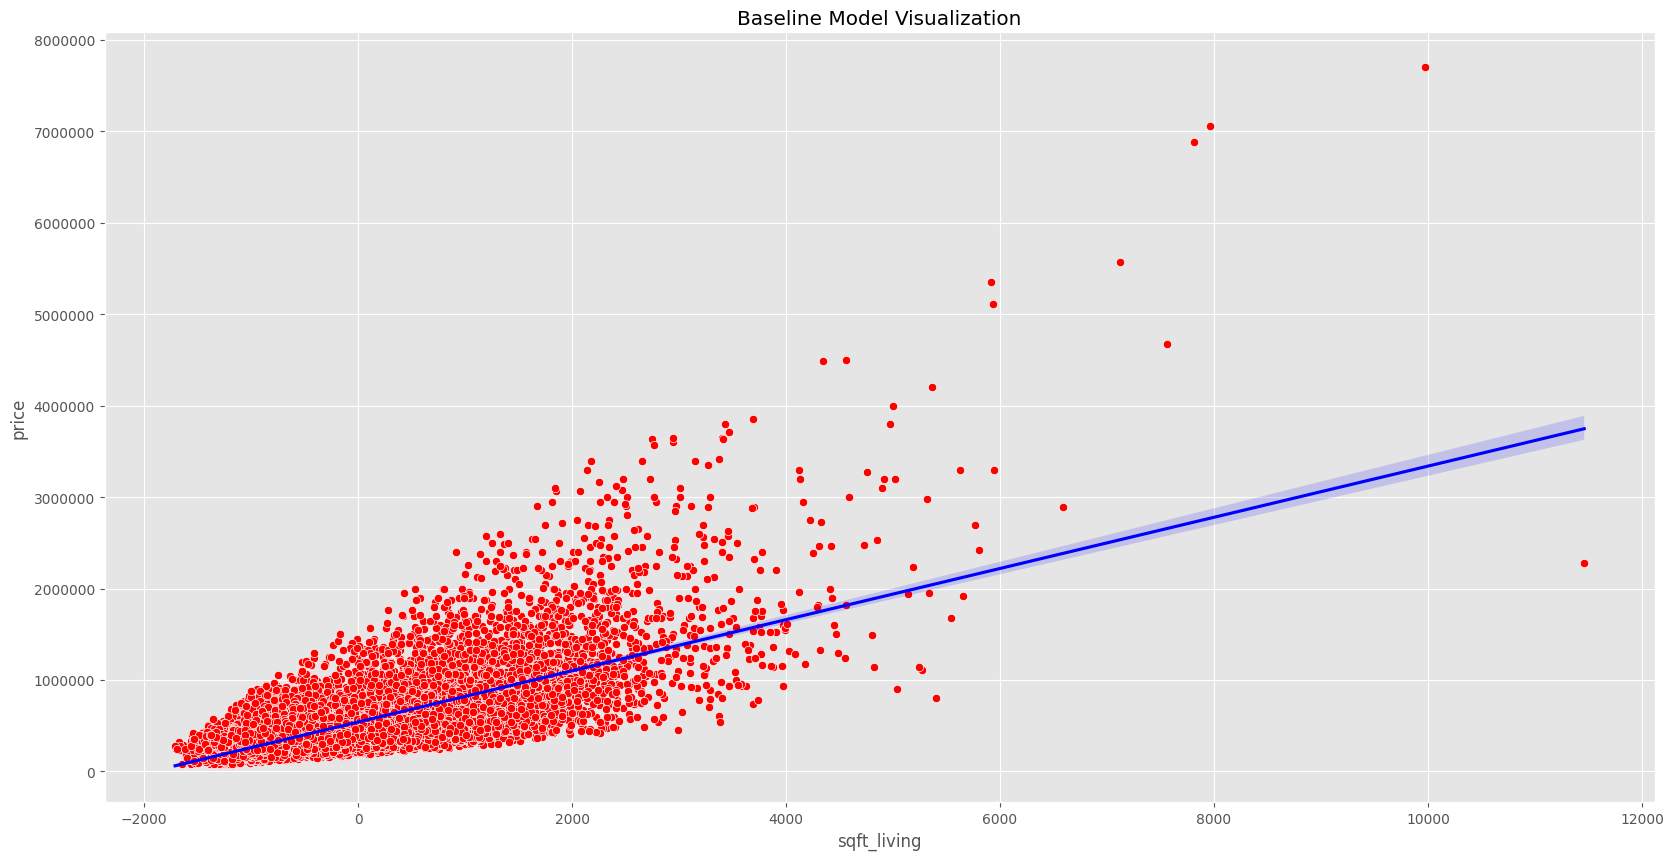

In [71]:
#visualizing the baseline model
fig,ax=plt.subplots(figsize=(20,10))
sns.scatterplot(x='sqft_living', y='price', data=data_subset, color='red',ax=ax)
ax.set_xlabel("Living  sqft")
sns.regplot(x='sqft_living', y='price',data=data_subset,ax=ax,color='blue',scatter=False)
ax.set_ylabel=('Price')
ax.set_title('Baseline Model Visualization')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [72]:
y_predict=results.predict(sm.add_constant(data_subset['sqft_living']))
mae=mean_absolute_error(data_subset['price'],y_predict)
print('mean_absolute_error:'+str(mae))

mean_absolute_error:173563.6822877504


Our mean absolute error comes out to $173k. The MAE characterizes the difference between the model's prediction and the dependent value. 

Multiple linear Regression and Modeling Interpretation with bathrooms.

In [73]:
data_subset['bathrooms']=data_subset['bathrooms']-data_subset['bathrooms'].median()
x_2=data_subset[['sqft_living','bathrooms']]
print(x_2)

       sqft_living  bathrooms
0      -899.827854      -1.25
1       490.172146       0.00
2     -1309.827854      -1.25
3      -119.827854       0.75
4      -399.827854      -0.25
...            ...        ...
21592  -549.827854       0.25
21593   230.172146       0.25
21594 -1059.827854      -1.50
21595  -479.827854       0.25
21596 -1059.827854      -1.50

[21534 rows x 2 columns]


In [74]:
second=sm.OLS(y, sm.add_constant(x_2))
second_results=second.fit()
print(second_results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.044e+04
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:51:53   Log-Likelihood:            -2.9912e+05
No. Observations:               21534   AIC:                         5.982e+05
Df Residuals:                   21531   BIC:                         5.983e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.393e+05   1839.630    293.177      

Multiple Linear Regression 

In [75]:
x_3=data_subset[['bedrooms','bathrooms','sqft_living']]
data_subset['bedrooms']=data_subset['bedrooms']-data_subset['bedrooms'].median()
x_3

,bedrooms,bathrooms,sqft_living
0,3,-1.25,-899.827854
1,3,0.00,490.172146
2,2,-1.25,-1309.827854
3,4,0.75,-119.827854
4,3,-0.25,-399.827854
...,...,...,...
21592,3,0.25,-549.827854
21593,4,0.25,230.172146
21594,2,-1.50,-1059.827854
21595,3,0.25,-479.827854


In [76]:
third=sm.OLS(data_subset['price'],sm.add_constant(x_3))
third_results=third.fit()
print(third_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     7368.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:51:53   Log-Likelihood:            -2.9881e+05
No. Observations:               21534   AIC:                         5.976e+05
Df Residuals:                   21530   BIC:                         5.977e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.384e+05   8175.156     90.325      

The model shows insights into the relationship between number of bedrooms, bathrooms and living square footage with the dependent variable price.

In [77]:
summary_table =pd.DataFrame(columns=['Model', 'Independent Variables', 'R-squared', 'Adj R-squared'])

summary_table.loc[0]=['Baseline Model', 'sqft_living', results.rsquared, results.rsquared_adj]
summary_table.loc[1]=['Second Model', 'sqft_living, bathrooms', second_results.rsquared, second_results.rsquared_adj]
summary_table.loc[2]=['Third Model', 'sqft_living, bathrooms, bedrooms', third_results.rsquared, third_results.rsquared_adj]

print(summary_table)

            Model             Independent Variables  R-squared  Adj R-squared
0  Baseline Model                       sqft_living   0.492225       0.492201
1    Second Model            sqft_living, bathrooms   0.492279       0.492232
2     Third Model  sqft_living, bathrooms, bedrooms   0.506574       0.506505


Based on the R-squared the third model has the highest value than the other models.

In [79]:
#Create the interaction term
data_subset['interaction_term'] = data_subset['sqft_living'] * data_subset['bathrooms']
# Specify the dependent variable and independent variables
y_interaction = data_subset['price']
X_interaction = data_subset[['sqft_living', 'bathrooms', 'interaction_term']]
# Add a constant to the independent variables
X_interaction = sm.add_constant(x)
# Fit the regression model
model = sm.OLS(y_interaction, X_interaction)
results = model.fit()
# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.087e+04
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:52:31   Log-Likelihood:            -2.9912e+05
No. Observations:               21534   AIC:                         5.982e+05
Df Residuals:                   21532   BIC:                         5.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.401e+05   1777.605    303.812      

In [80]:
y_pred_interaction=results.predict(X_interaction)
mae_interaction=mean_absolute_error(y_interaction, y_pred_interaction)
print('mean absolute error final:', mae_interaction)

mean absolute error final: 173563.6822877504


The mean absolute error for the final is 166580.278323627 which is less than the baseline mean absolute error of 173563.6822877504.

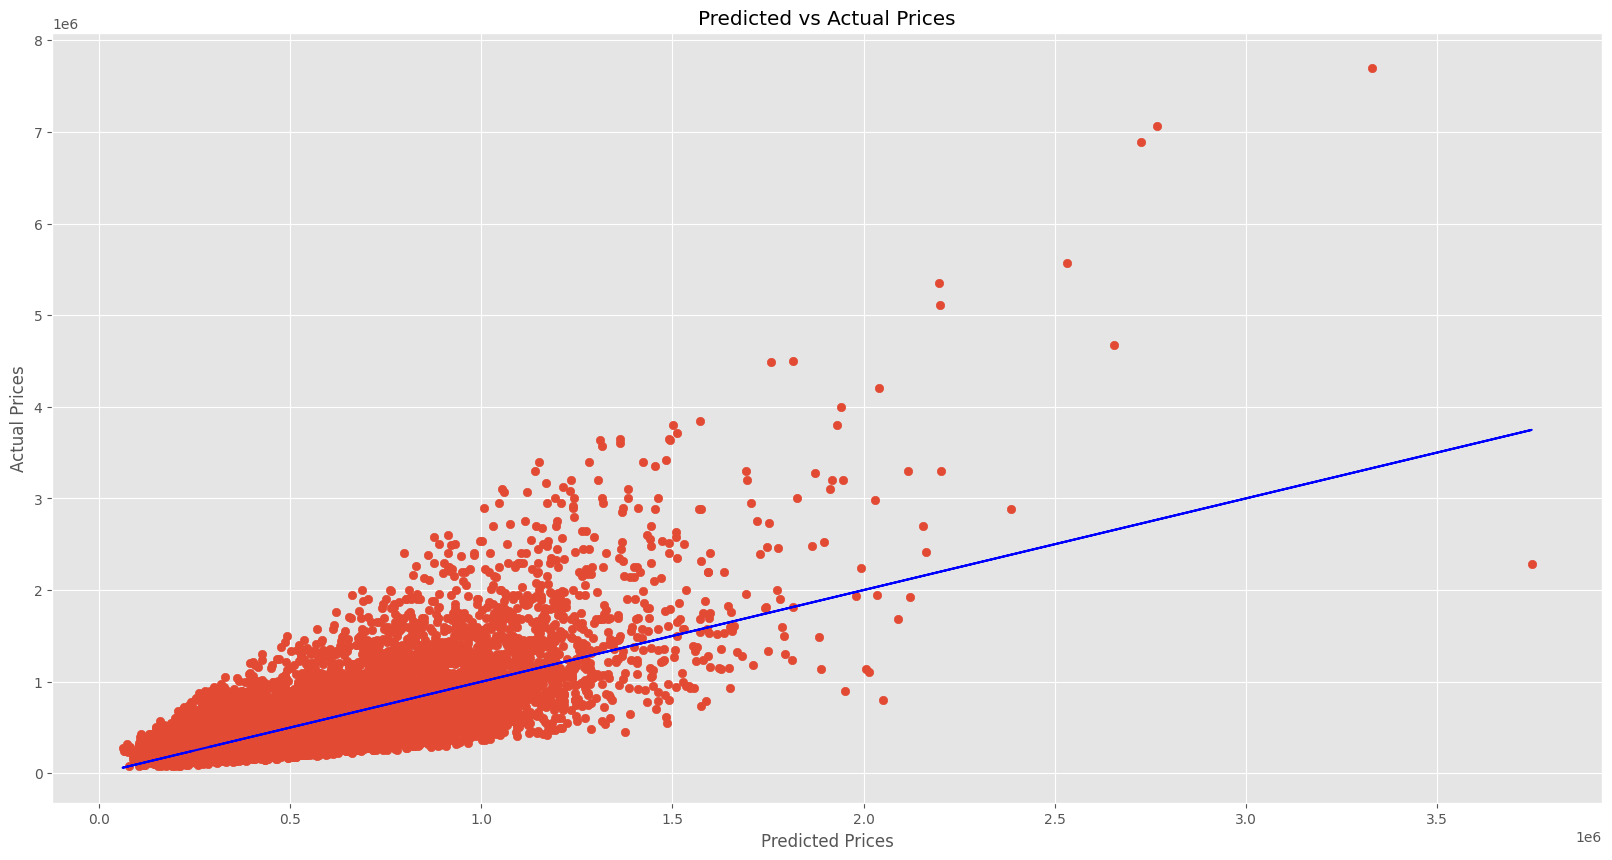

In [82]:
#Create a scatter plot
fig,ax=plt.subplots(figsize=(20,10))
plt.scatter(y_pred_interaction, y_interaction)
#Add the linear regression line
plt.plot(y_pred_interaction,y_pred_interaction, color='blue',label='Regression Line')

# Add labels and title
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices")
plt.title("Predicted vs Actual Prices")

# Show the plot
plt.show()

RECOMMENDATION.

King County real estate agencies should consider maximizing their property values by including extra amenities such as having excellent house views.

Homeowners should also consider elevating their house values by improving amenities such as bathrooms and bedrooms. King County home sellers can use the regression models to determine a given property  compared to a given home. Improved amenities such as bathrooms and bedrooms have a great impact on the house value.

I would also advise King County real estate agency to advise homeowners in considering more square feet in their house when building or renovating.

The linear Regression indicates the impact on the house sale price by the homeowners doing renovations and the type of renovations that would boost the market of the homes.

NEXT STEPS

King County should consider looking at the most recent trends in the housing market. Conducting market research through media study on what is modern in order to gain different insights and maximize the sale.